In [1]:
#importing libraries
import numpy as np # for maths
import matplotlib.pyplot as plt   #for visuals
import pandas as pd  #for handling data sets
from sklearn.preprocessing import Imputer  #to take care of missing data

In [2]:
data = pd.read_csv("C:/Users/Vishnu/Desktop/ML/Logisticregression/Social_Network_Ads.csv")

In [3]:
datac = data.copy()
#independent variable
#X = datac.drop('Salary',axis=1)
X= data.iloc[:,[2,3]].values
Y= data.iloc[:,4].values

In [4]:
#Splitting into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [5]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
X_scaled=StandardScaler()
X_train=X_scaled.fit_transform(X_train) #for training set we need to fit and transform
X_test=X_scaled.transform(X_test)

In [6]:
#X_train,X_test
#End of Preprocessing

In [7]:
#Fitting Logistic Regression to Training Data

#Use the desired classifier

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)


C:\Users\Vishnu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
#Predicting the Test set results
Y_pred = classifier.predict(X_test)
YPred_values = classifier.predict_proba(X_test)

In [14]:
YPred_values

array([[0.8835313 , 0.1164687 ],
       [0.82871699, 0.17128301],
       [0.8004837 , 0.1995163 ],
       [0.90739447, 0.09260553],
       [0.89926493, 0.10073507],
       [0.99169199, 0.00830801],
       [0.98410063, 0.01589937],
       [0.26459889, 0.73540111],
       [0.99384437, 0.00615563],
       [0.4907332 , 0.5092668 ],
       [0.96238257, 0.03761743],
       [0.96947917, 0.03052083],
       [0.83490307, 0.16509693],
       [0.62448827, 0.37551173],
       [0.98369807, 0.01630193],
       [0.65886488, 0.34113512],
       [0.7144286 , 0.2855714 ],
       [0.98708287, 0.01291713],
       [0.01150228, 0.98849772],
       [0.95626217, 0.04373783],
       [0.90763174, 0.09236826],
       [0.03668135, 0.96331865],
       [0.71749074, 0.28250926],
       [0.11706887, 0.88293113],
       [0.99524108, 0.00475892],
       [0.02710673, 0.97289327],
       [0.91943183, 0.08056817],
       [0.92088349, 0.07911651],
       [0.80168341, 0.19831659],
       [0.83888382, 0.16111618],
       [0.

In [17]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix  #confusion matrx is a function --see the lowercase
cm = confusion_matrix(Y_test,Y_pred)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


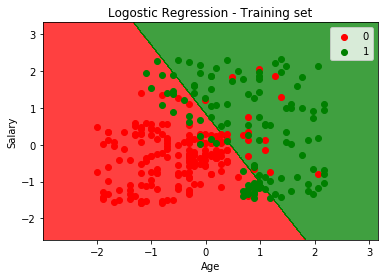

In [25]:
#Visualizing the predictive power
from matplotlib.colors import ListedColormap
X_set,Y_set = X_train, Y_train # can change to X_test and Y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:,0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha = 0.75,
             cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set==j,0],X_set[Y_set==j,1], c = ListedColormap(('red','green'))(i),label=j)
    
plt.title('Logostic Regression - Training set')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()


    